# WEB SCRAPING 2019 - 2020 THRILLER MOVIES 

In [36]:
# importing libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools

In [37]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 5000)
pd.set_option('expand_frame_repr', True)

In [38]:
url  = "https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2020-12-31&user_rating=6.5,&num_votes=50000,&genres=thriller&sort=user_rating,desc"
# get the soup object for main api url

In [39]:
def getSoup(url):
    """
    Utility function which takes a url and returns a Soup object.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    return soup

In [40]:
movies_soup = getSoup(url)

In [41]:
movie_tags = movies_soup.find_all('a', attrs={'class': None})

# filter the a-tags to get just the titles
movie_tags = [tag.attrs['href'] for tag in movie_tags 
              if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]

movie_tags = list(dict.fromkeys(movie_tags))

print("There are a total of " + str(len(movie_tags)) + " movie titles")
print("Displaying 20 titles")
movie_tags[:20]

There are a total of 30 movie titles
Displaying 20 titles


['/title/tt6751668/',
 '/title/tt7286456/',
 '/title/tt8579674/',
 '/title/tt8946378/',
 '/title/tt1070874/',
 '/title/tt9071322/',
 '/title/tt9620292/',
 '/title/tt6723592/',
 '/title/tt6146586/',
 '/title/tt5727208/',
 '/title/tt5606664/',
 '/title/tt0437086/',
 '/title/tt8772262/',
 '/title/tt7395114/',
 '/title/tt1051906/',
 '/title/tt8228288/',
 '/title/tt1860242/',
 '/title/tt7798634/',
 '/title/tt6857112/',
 '/title/tt8936646/']

In [42]:
base_url = "https://www.imdb.com"
movie_links = [base_url + tag + 'reviews' for tag in movie_tags]
print("There are a total of " + str(len(movie_links)) + " movie user reviews")
print("Displaying 20 user reviews links")
movie_links[:20]

There are a total of 30 movie user reviews
Displaying 20 user reviews links


['https://www.imdb.com/title/tt6751668/reviews',
 'https://www.imdb.com/title/tt7286456/reviews',
 'https://www.imdb.com/title/tt8579674/reviews',
 'https://www.imdb.com/title/tt8946378/reviews',
 'https://www.imdb.com/title/tt1070874/reviews',
 'https://www.imdb.com/title/tt9071322/reviews',
 'https://www.imdb.com/title/tt9620292/reviews',
 'https://www.imdb.com/title/tt6723592/reviews',
 'https://www.imdb.com/title/tt6146586/reviews',
 'https://www.imdb.com/title/tt5727208/reviews',
 'https://www.imdb.com/title/tt5606664/reviews',
 'https://www.imdb.com/title/tt0437086/reviews',
 'https://www.imdb.com/title/tt8772262/reviews',
 'https://www.imdb.com/title/tt7395114/reviews',
 'https://www.imdb.com/title/tt1051906/reviews',
 'https://www.imdb.com/title/tt8228288/reviews',
 'https://www.imdb.com/title/tt1860242/reviews',
 'https://www.imdb.com/title/tt7798634/reviews',
 'https://www.imdb.com/title/tt6857112/reviews',
 'https://www.imdb.com/title/tt8936646/reviews']

In [43]:
def getReviewText(review_url):
    '''Returns the user review text given the review url.'''
    
    # get the review_url's soup
    soup = getSoup(review_url)
    
    # find div tags with class text show-more__control
    tag = soup.find('div', attrs={'class': 'text show-more__control'})
    
    return tag.getText()

In [44]:
# get review text from the review link
review_texts = [getReviewText(url) for url in movie_links]

In [45]:
movie_containers = movies_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(len(movie_containers))

30


In [46]:
# The name of the movies
names = []
for container in movie_containers:
  name = container.h3.a.text
  names.append(name)

In [47]:
# construct a dataframe
df = pd.DataFrame({'movie': names, 'review': review_texts})


In [48]:
df.head()

movie  \
0                    Parasite   
1                       Joker   
2                        1917   
3                  Knives Out   
4  The Trial of the Chicago 7   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [49]:
df.tail()

,movie,review
25,Anna,"Entertaining, lots of twists and turns, never quite sure what's next or where it's going, but the ride's good, especially the 4 leads. Almost didn't rent due to some bad reviews here, I guess sometimes good to trust the positive ones"
26,"Extremely Wicked, Shockingly Evil and Vile","By now, people know about Ted Bundy and what a monster he was. But people who are saying this movie is boring, I believe they are missing the point. It's not about the Gorey details of his crimes, it's about Bundy's relationship with people and how manipulative he was.I am a true crime fan and have always considered myself ""too smart to fall for such evil"", but I have to admit, there were times when I found myself rooting for Ted Bundy and then realized what I was doing. If you let yourself be fully submerged in the movie and toss out any expectations and what you think you know about Ted Bundy, I think you will be pleasantly surprised at what you are able to feel about someone who was a living nightmare. It made me realize why so many women could have actually fallen for Bundy's tricks."
27,Bad Boys for Life,"A { - micro - } review .\n___________________________________________________Caution 🚸 ✋ : This Is A "" Profoundly Profane "" Film . { Puh Lease❗❗} do not take Anything Or Anyone even vaguely ...Resembling... a { - Minor - } human being to this movie. It is Very Clearly geared towards Adults, and Adults .....{ Alone } .\n___________________________________________________OK then, having gotten that ( - Very ⭐ - ) crucial 'little' detail out of the way, let's get started. The plain truth of the matter is, that I set out to watch ""Birds Of Prey"" , got held up in some seriously unexpected, mad, traffic ; and ended up having to settle for ""Bad Boys III"", instead. As you've no doubt gathered by now, I'd not been much of a stickler for said franchise, prior to this . But, being the { - Die Hard - } "" Fun Lovin' 😎 📽 Film-Junkie "" that I've ( pretty much - Always ) been, I found myself quietly leaping at the opportunity to ' unravel ' the mystery behind this Film's ""Pleasantly Surprising"" 7.3 🌠 IMDb Audience-score { given that - ( seemingly ) - far better films have done 'stunningly' worse..... with the very same crowd ( - broadly speaking - ) } .And here's what I found. It's no Oscar contender, that's for damn sure. However, it is { - Undeniably - } spearheaded by some 'Seriously Strong' Performances ( And Joe Pantoliano 🔥 , Kate Del Castillo & Jacob Scipio jump to mind - Immediately- when I say that ).... & some ""Dangerously"" Potent & - Capable - Eye Candy ( in the form of Paola Nuñez And Vanessa Hudgens' Miami Cops..... from a - Very Refreshingly - less 'Gung-Ho' special forces mini division known, rather ironically, as ""A.m.m.o"" ). Indeed, the film is borne of a Thoroughly { - Curious - } "" Profane, Dramatic, Unpredictable, & - of course - Comedic 🥂 🤣 🤣 'Cocktail' "" of : 1. Massive Action Scenes , 2. Truly "" Fresh "" Storytelling , 3. Pure Chaos ; & Yes... { - even - } 4. A Degree Of Spirituality, as well {❗} .So Much So, that it indeed leaves you believing that Hollywood ""Can Actually"" ( - At Times, Atleast - ) be comfortable with being seen to be 'genuinely' attempting to do it's - ' Very Own ' - fair share of "" Soul-Searching "" - { Within The Context Of The Film Itself } - resulting in the ( "" Credible "" ) infusion of Powerful Messages of Friendship, Hope { - & Even - } "" Redemption 😇 "" . . . . . into some of its ( Major ) 'Mindless-Fun Type' Action-Blockbuster Offerings.My Summation : "" I Hadn't Laughed So Hard Since The Lighter Moments In 'JoJo Rabbit' . { - Nor - } Did I Necessarily Find Martin Lawrence 'Unbearable' . This Movie { - Does - } Then , All Said And Done , Get A Generous , Exuberant Full Score From Me 👊❗"" ."
28,The Hunt,"Much more enjoyable than expected.The beginning of it is funny enough, but it is the ensuing few scenes which are riotously HILARIOUS and make it worth watching-

In [50]:
df = df.drop(labels=range(20, 30), axis=0)


In [51]:
df.tail()

movie  \
15    The Platform   
16  The Highwaymen   
17    Ready or Not   
18              Us   
19      Extraction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [52]:
df.head()

movie  \
0                    Parasite   
1                       Joker   
2                        1917   
3                  Knives Out   
4  The Trial of the Chicago 7   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [53]:
df=df.drop(['movie'], axis=1)
df.head()

review
0  It's not really a review but my attempt to explain how I interpreted the movie to those who complain that the film is overrated, especially if the reason is that they didn't like the second half of it.It's much easier to understand the message of a movie when the 'good guys' win or the 'bad guys' get punished in the end. I'm not saying that all Hollywood films are so naive in their portrayal of moral values. But still, I believe that Parasite is much more subtle than most other movies that people are accustomed to watching in which there's a character with a clearer 'moral center' whom audiences can easily relate to. So, I think it's no surprise if the message of this film had failed to register for some of the audiences.Some complained that they don't understand Ki-Taek's motive for killing Mr. Park. But to fully appreciate this, you need to understand the meaning of a recurring expression in the dialogue which is, "crossing the line".It's a deliberately ambiguous phrase that can either read as one should respect other people's privacy or as one should mind one's own (social) position instead of meddling with the affairs of those in a different position. If interpreted as the latter meaning, it can serve as another image that emphasizes the subject matter of the narrative, along with more easy to notice the metaphor of the two families' respective dwellings.It would probably have satisfied such audiences who expected more lighthearted drama if the movie focused on an underprivileged, but more likable family exploiting a cold hearted snobbish family in a comical manner. But the movie would have lost all its genuine charms if Bong Joon-Ho chose such a path, and he is too good a director not to see such a danger.Instead, he chose to make Mr. Park a reasonable enough character, despite his occasional hints that reveal his true nature. He seems to treat Ki-Taek fairly enough at first, but he also warns the latter not to 'cross the line' if Ki-Taek attempts to pry into his private life.At first, it seems that it's quite easy for Ki-Taek and other members of his family to sneak into Mr. Park's house in various roles and mingle with them. Ki-Taek even compliments how nice Mr. Park's family is, but his premature admiration soon gets challenged when he overheard, when he was hiding under the table, what Mr. Park really thinks of him - almost a different species of the human being who doesn't even smell like him.Ki-Taek's final disillusionment came when Mr. Park cringes from the smell of the dead basement dweller and shows much more concern for his son's shock while virtually ignoring Ki-Taek's daughter's status who's dying on the ground, spurting blood from the stab wound.That moment, Ki-Taek realizes how Mr. Park sees him and his whole family as not an equal human being, but something much more insignificant.And he also realizes the 'line' that separates the two families is not just that of courtesy or proper social behaviour. Instead, it is a line that can even determine the life of those 'lesser' human beings to be less important than the passing unpleasant feelings or mental shock of those 'proper' human beings.However easy it was for Ki-Taek's family to sneak into Mr. Park's house, or however they try to socialize and mingle with Mr. Park's family, their existence is no better than that of a 'parasite', which is also visualized so effectively by the presence of the hidden basement room inside the house.With such disillusionment and anger, Ki-Taek chose to kill Mr. Park, as a parasite could to its host, and like a parasite, he keeps hiding deep inside the dead host's body until he could claim the whole of the carcass and use it as nourishment for his offsprings.The tragedy was not something caused by any exceptional defect or vice of either Mr. Park's or Ki-Taek's personalities. Instead, it's a 'line' drawn by an invisible hand, separating those classes according to their respective social conditions, which can be so brut

In [54]:
df.to_csv('review.csv')

# NLP AND KEYWORD EXTRACTION

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## DATA CLEANING

In [56]:
from nltk.corpus import stopwords
# making all as Lower case
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Removing Punctuation
df['review'] = df['review'].str.replace('[^\w\s]','')
# Removal of Stop Words
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Removing numbers
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if not x.isnumeric()))
df.head()

,review
0,really review attempt explain interpreted movie complain film overrated especially reason didnt like second half itits much easier understand message movie good guys win bad guys get punished end im saying hollywood films naive portrayal moral values still believe parasite much subtle movies people accustomed watching theres character clearer moral center audiences easily relate think surprise message film failed register audiencessome complained dont understand kitaeks motive killing mr park fully appreciate need understand meaning recurring expression dialogue crossing lineits deliberately ambiguous phrase either read one respect peoples privacy one mind ones social position instead meddling affairs different position interpreted latter meaning serve another image emphasizes subject matter narrative along easy notice metaphor two families respective dwellingsit would probably satisfied audiences expected lighthearted drama movie focused underprivileged likable family exploiting cold hearted snobbish family comical manner movie would lost genuine charms bong joonho chose path good director see dangerinstead chose make mr park reasonable enough character despite occasional hints reveal true nature seems treat kitaek fairly enough first also warns latter cross line kitaek attempts pry private lifeat first seems quite easy kitaek members family sneak mr parks house various roles mingle kitaek even compliments nice mr parks family premature admiration soon gets challenged overheard hiding table mr park really thinks almost different species human doesnt even smell like himkitaeks final disillusionment came mr park cringes smell dead basement dweller shows much concern sons shock virtually ignoring kitaeks daughters status whos dying ground spurting blood stab woundthat moment kitaek realizes mr park sees whole family equal human something much insignificantand also realizes line separates two families courtesy proper social behaviour instead line even determine life lesser human beings less important passing unpleasant feelings mental shock proper human beingshowever easy kitaeks family sneak mr parks house however try socialize mingle mr parks family existence better parasite also visualized effectively presence hidden basement room inside housewith disillusionment anger kitaek chose kill mr park parasite could host like parasite keeps hiding deep inside dead hosts body could claim whole carcass use nourishment offspringsthe tragedy something caused exceptional defect vice either mr parks kitaeks personalities instead line drawn invisible hand separating classes according respective social conditions brutal able deprive two families humanity contrasting manners believe message film trying conveyof course every movie must make commentary society rather providing carefree pastime everyone understandbut without movie didnt change gear second half shed light serious inherent problem society would another heist gone wrong type comedy instead deserving candidate called best film year
1,every movie comes truly makes impact joaquins performance scenography brilliance grotesque haunting cringy hard watch times mesmerizing wont blink eye watching tragic seriously funny moments emotional rollercoaster sometimes multiple emotions poppingup timethis far typical actionriddled predictable superhero movie proper psychological thrillerdrama single best character development ever seen
2,last night col ferry col coldwell usa able watch new wwi film national release cinematographic feast eyes long expansive shots follow protagonists execute mission hide horrors existed trench warfare shows brutality abundance great uncle died consequence service fighting trenches mustard gas poisoning many ways reminded saving private ryanfor served combat deployments iraq afghanistan cannot tell film difficult watch might well especially incoming artillery trigger camera travels inches dirt advancing slowly berm response visceral taken back patrols walke

In [57]:
# tokenization and find the frequency
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
t=[]
for i in range(len(df['review'])):
    tokenized_text=sent_tokenize(df['review'][i])
    tokenized_word=word_tokenize(df['review'][i])
    t =t+tokenized_word
#print(t)
freq = pd.Series(' '.join(df['review']).split()).value_counts()[:10]
print(freq)
fdist = FreqDist(t)
print(fdist)

movie          43
film           40
timeline       23
red            22
blue           20
protagonist    19
food           16
see            15
also           14
good           14
dtype: int64
<FreqDist with 1551 samples and 2943 outcomes>


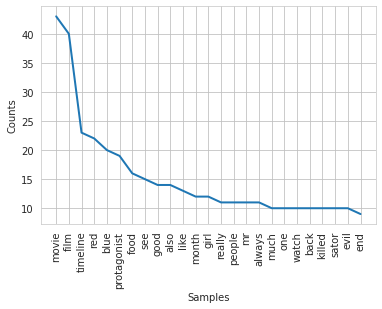

In [58]:
import matplotlib.pyplot as plt

fdist.plot(25,cumulative=False)

plt.show()

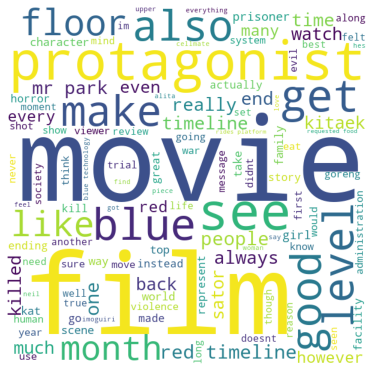

In [59]:
#WORD CLOUD
from wordcloud import WordCloud
comment_words = ' '
for words in t: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color='white' , 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [60]:
from textblob import TextBlob
TextBlob(df['review'][0]).ngrams(2)

[WordList(['really', 'review']),
 WordList(['review', 'attempt']),
 WordList(['attempt', 'explain']),
 WordList(['explain', 'interpreted']),
 WordList(['interpreted', 'movie']),
 WordList(['movie', 'complain']),
 WordList(['complain', 'film']),
 WordList(['film', 'overrated']),
 WordList(['overrated', 'especially']),
 WordList(['especially', 'reason']),
 WordList(['reason', 'didnt']),
 WordList(['didnt', 'like']),
 WordList(['like', 'second']),
 WordList(['second', 'half']),
 WordList(['half', 'itits']),
 WordList(['itits', 'much']),
 WordList(['much', 'easier']),
 WordList(['easier', 'understand']),
 WordList(['understand', 'message']),
 WordList(['message', 'movie']),
 WordList(['movie', 'good']),
 WordList(['good', 'guys']),
 WordList(['guys', 'win']),
 WordList(['win', 'bad']),
 WordList(['bad', 'guys']),
 WordList(['guys', 'get']),
 WordList(['get', 'punished']),
 WordList(['punished', 'end']),
 WordList(['end', 'im']),
 WordList(['im', 'saying']),
 WordList(['saying', 'hollywood'

## KEYWORD EXTRACTION BY USING TF-IDF

In [61]:
#Term frequency
tf1 = (df['review'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,movie,2
1,scenography,1
2,hard,1
3,poppingup,1
4,every,1


In [62]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['review'].str.contains(word)])))

tf1.head()

,words,tf,idf
0,movie,2,0.510826
1,scenography,1,2.995732
2,hard,1,2.302585
3,poppingup,1,2.995732
4,every,1,0.798508


In [63]:
#multiplying the Term Frequency and Inverse Document Frequency (TF-IDF)
tf1['tf-idf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tf-idf
0,movie,2,0.510826,1.021651
1,scenography,1,2.995732,2.995732
2,hard,1,2.302585,2.302585
3,poppingup,1,2.995732,2.995732
4,every,1,0.798508,0.798508


In [64]:
tf1.tail()

,words,tf,idf,tf-idf
41,times,1,1.386294,1.386294
42,single,1,1.897120,1.897120
43,ever,1,0.356675,0.356675
44,seen,1,1.609438,1.609438
45,seriously,1,2.995732,2.995732


# Multiplying these two quantities provides the TF-IDF score of a word in a document. The higher the score is, the more relevant the word is to the document. So the above forty five words are generated keywords by using TF-IDF

# SENTIMENT ANALYSIS

In [65]:
from textblob import TextBlob
for i in range(len(df['review'])):
    se=TextBlob(df['review'][i])
    print(se.sentiment)

Sentiment(polarity=0.07713414634146341, subjectivity=0.44115853658536563)
Sentiment(polarity=-0.027125850340136055, subjectivity=0.5254251700680271)
Sentiment(polarity=0.09820375702728644, subjectivity=0.4051299191005073)
Sentiment(polarity=0.3486666666666667, subjectivity=0.548)
Sentiment(polarity=0.15371031746031744, subjectivity=0.4655357142857143)
Sentiment(polarity=0.24166666666666667, subjectivity=0.7479166666666668)
Sentiment(polarity=0.11785714285714287, subjectivity=0.6714285714285715)
Sentiment(polarity=0.003990610328638499, subjectivity=0.10780516431924882)
Sentiment(polarity=0.06426406926406926, subjectivity=0.5222077922077922)
Sentiment(polarity=-0.052851239669421485, subjectivity=0.6099449035812673)
Sentiment(polarity=0.3402930402930403, subjectivity=0.6345848595848594)
Sentiment(polarity=0.22604166666666667, subjectivity=0.6267857142857142)
Sentiment(polarity=0.06645021645021647, subjectivity=0.6004329004329004)
Sentiment(polarity=-0.03748015873015874, subjectivity=0.625

In [66]:
for i in range(len(df['review'])):
    se=TextBlob(df['review'][i])
    print(se.sentiment)
    if se.sentiment.polarity >= 0: 
      b='Postive Review'
    else:
      b='Negative Review'
df['sentiment']=b
df.head()

Sentiment(polarity=0.07713414634146341, subjectivity=0.44115853658536563)
Sentiment(polarity=-0.027125850340136055, subjectivity=0.5254251700680271)
Sentiment(polarity=0.09820375702728644, subjectivity=0.4051299191005073)
Sentiment(polarity=0.3486666666666667, subjectivity=0.548)
Sentiment(polarity=0.15371031746031744, subjectivity=0.4655357142857143)
Sentiment(polarity=0.24166666666666667, subjectivity=0.7479166666666668)
Sentiment(polarity=0.11785714285714287, subjectivity=0.6714285714285715)
Sentiment(polarity=0.003990610328638499, subjectivity=0.10780516431924882)
Sentiment(polarity=0.06426406926406926, subjectivity=0.5222077922077922)
Sentiment(polarity=-0.052851239669421485, subjectivity=0.6099449035812673)
Sentiment(polarity=0.3402930402930403, subjectivity=0.6345848595848594)
Sentiment(polarity=0.22604166666666667, subjectivity=0.6267857142857142)
Sentiment(polarity=0.06645021645021647, subjectivity=0.6004329004329004)
Sentiment(polarity=-0.03748015873015874, subjectivity=0.625

,review,sentiment
0,really review attempt explain interpreted movie complain film overrated especially reason didnt like second half itits much easier understand message movie good guys win bad guys get punished end im saying hollywood films naive portrayal moral values still believe parasite much subtle movies people accustomed watching theres character clearer moral center audiences easily relate think surprise message film failed register audiencessome complained dont understand kitaeks motive killing mr park fully appreciate need understand meaning recurring expression dialogue crossing lineits deliberately ambiguous phrase either read one respect peoples privacy one mind ones social position instead meddling affairs different position interpreted latter meaning serve another image emphasizes subject matter narrative along easy notice metaphor two families respective dwellingsit would probably satisfied audiences expected lighthearted drama movie focused underprivileged likable family exploiting cold hearted snobbish family comical manner movie would lost genuine charms bong joonho chose path good director see dangerinstead chose make mr park reasonable enough character despite occasional hints reveal true nature seems treat kitaek fairly enough first also warns latter cross line kitaek attempts pry private lifeat first seems quite easy kitaek members family sneak mr parks house various roles mingle kitaek even compliments nice mr parks family premature admiration soon gets challenged overheard hiding table mr park really thinks almost different species human doesnt even smell like himkitaeks final disillusionment came mr park cringes smell dead basement dweller shows much concern sons shock virtually ignoring kitaeks daughters status whos dying ground spurting blood stab woundthat moment kitaek realizes mr park sees whole family equal human something much insignificantand also realizes line separates two families courtesy proper social behaviour instead line even determine life lesser human beings less important passing unpleasant feelings mental shock proper human beingshowever easy kitaeks family sneak mr parks house however try socialize mingle mr parks family existence better parasite also visualized effectively presence hidden basement room inside housewith disillusionment anger kitaek chose kill mr park parasite could host like parasite keeps hiding deep inside dead hosts body could claim whole carcass use nourishment offspringsthe tragedy something caused exceptional defect vice either mr parks kitaeks personalities instead line drawn invisible hand separating classes according respective social conditions brutal able deprive two families humanity contrasting manners believe message film trying conveyof course every movie must make commentary society rather providing carefree pastime everyone understandbut without movie didnt change gear second half shed light serious inherent problem society would another heist gone wrong type comedy instead deserving candidate called best film year,Postive Review
1,every movie comes truly makes impact joaquins performance scenography brilliance grotesque haunting cringy hard watch times mesmerizing wont blink eye watching tragic seriously funny moments emotional rollercoaster sometimes multiple emotions poppingup timethis far typical actionriddled predictable superhero movie proper psychological thrillerdrama single best character development ever seen,Postive Review
2,last night col ferry col coldwell usa able watch new wwi film national release cinematographic feast eyes long expansive shots follow protagonists execute mission hide horrors existed trench warfare shows brutality abundance great uncle died consequence service fighting trenches mustard gas poisoning many ways reminded saving private ryanfor served combat deployments iraq afghanistan cannot tell film difficult watch might well especially incoming artillery trigger camera travels inches dirt advancing slowly berm re